In [197]:
#import libraries

import requests
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [198]:
#get content from url

url = f'https://www.bookdepository.com/bestsellers'
response = requests.get(url)
html = response.content
soup = bs(html, 'lxml')

In [199]:
#data fields to save

title = []
book_format = []
pub_date = []
price = []

In [200]:
#find book informations

books = soup.find_all('div', class_='book-item')

for book in books:
    title.append(book.find('h3', class_='title').get_text(strip=True))
    book_format.append(book.find('p', class_='format').get_text(strip=True))
    pub_date.append(book.find('p', class_='published').get_text(strip=True)[-4:])
    
    price_wrap = book.find('div', class_='price-wrap')
    
    if price_wrap.find('p', class_='price'):
        price_info = price_wrap.find('p', class_='price')
        current_price = float(price_info.get_text(strip=True).split(' ')[0].replace(',', '.'))
    else:
        current_price = None
    price.append(current_price)

In [205]:
#save data to .csv file

data = {
    'Title': title,
    'Format of Book': book_format,
    'Year Published': pub_date,
    'Price': price
}

df = pd.DataFrame(data)
df.to_csv('data.csv')
print(df.head())

                      Title Format of Book Year Published  Price
0      The Midnight Library      Paperback           2021   8.65
1      Surrounded by Idiots      Paperback           2019  10.21
2          How to Cook That       Hardback           2021  21.44
3                     Later      Paperback           2021   9.73
4  They Both Die at the End      Paperback           2017   8.95


<AxesSubplot:xlabel='Book prices in euro', ylabel='Number of books'>

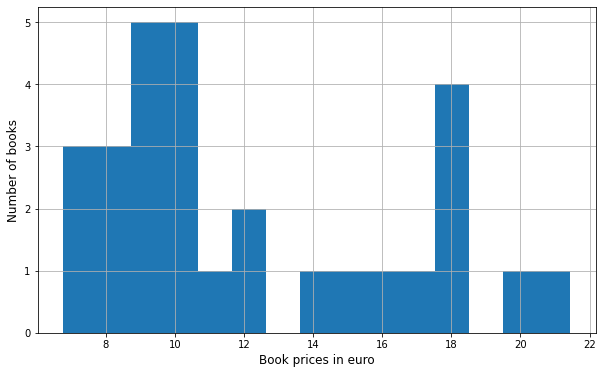

In [207]:
#data viz about current prices

%matplotlib inline
plt.figure(figsize=(10, 6))
plt.xticks(np.arange(0, 40, step=2))
plt.yticks(np.arange(0, 11, step=1))
plt.xlabel("Book prices in euro", fontsize = 12)
plt.ylabel("Number of books", fontsize = 12)
df['Price'].hist(bins=15)